# Name: Tufan Kundu
# Reg no: 24MDT0184


# EDA lab
## 14 February

## PCA on Iris Dataset

### Importing the necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Loading the dataset

In [2]:
iris = load_iris()

## Creating dataframe with feature names
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
## Checking the shape of the data
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Visualizing the dataset with pairplot

<Figure size 800x600 with 0 Axes>

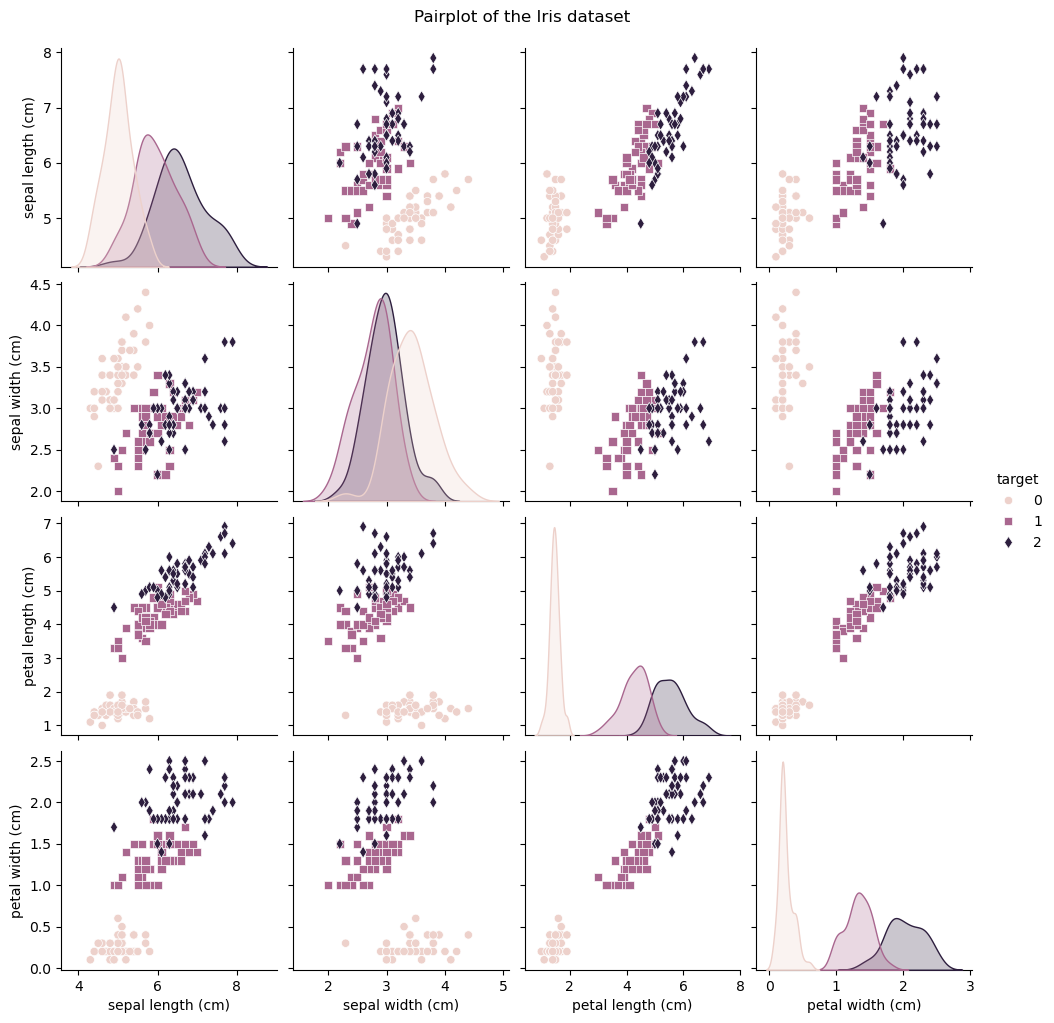

In [6]:
plt.figure(figsize=(8,6))
sns.pairplot(df,hue='target',markers = ["o","s","d"])
plt.suptitle("Pairplot of the Iris dataset",y = 1.02)
plt.show()

### extracting the feature and target

In [7]:
features = iris.feature_names
x = df.loc[:,features].values
y = df.loc[:,['target']].values

## Standardising the features
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

print("Mean of standardized features(should be close to 0):",np.mean(x_std,axis = 0))
print("Standard deviation (should be 1):",np.std(x_std,axis = 0))

Mean of standardized features(should be close to 0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Standard deviation (should be 1): [1. 1. 1. 1.]


In [8]:
### Initializing PCA to reduce the data to 2 components

pca = PCA(n_components=2)
principalcomponents = pca.fit_transform(x_std)

## Creating dataframe for the two principal components
principaldf = pd.DataFrame(data = principalcomponents, columns=['PC1','PC2'])

## Concatenate the target variable for plotting

final_df = pd.concat([principaldf,df[['target']]],axis = 1)

final_df

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


### Visualizing the PCA results

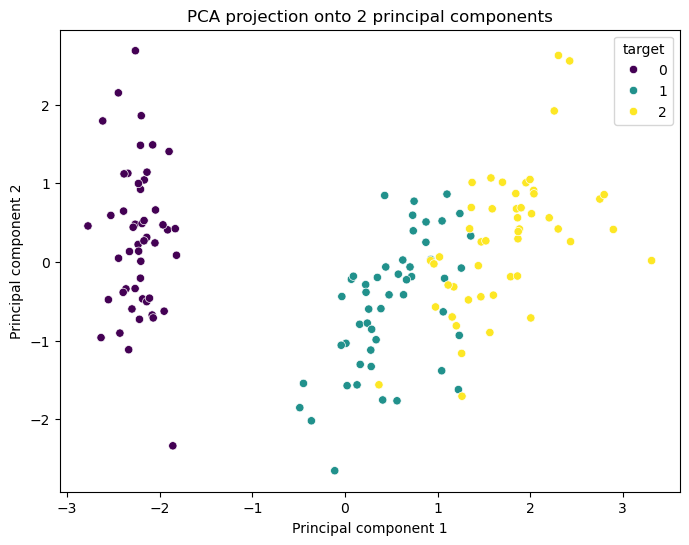

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1',y = 'PC2', hue = 'target', data = final_df, palette = 'viridis')
plt.title("PCA projection onto 2 principal components")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.legend(title='target')
plt.show()

Explained variance ratio for 2 components:
[0.72962445 0.22850762]


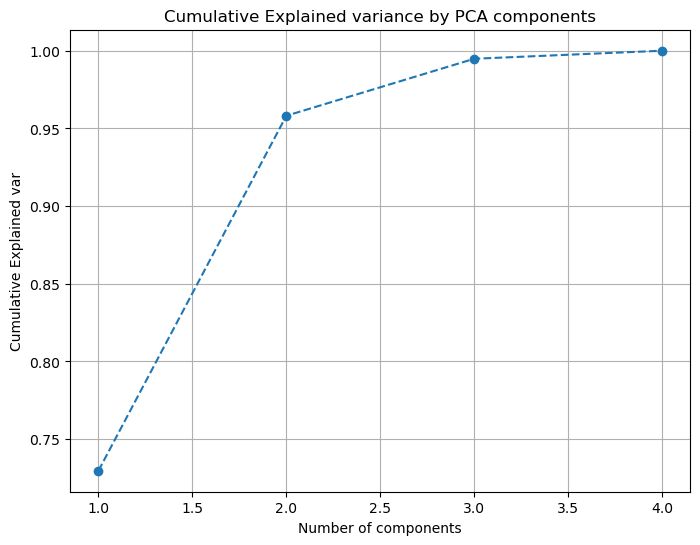

In [10]:
## Analyzing the explained variance

print("Explained variance ratio for 2 components:")
print(pca.explained_variance_ratio_)

## cumulative explained variance with all components
pca_full = PCA().fit(x_std)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize = (8,6))
plt.plot(np.arange(1,len(cum_var)+1),cum_var,marker = 'o', linestyle = '--')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained var")
plt.title("Cumulative Explained variance by PCA components")
plt.grid(True)
plt.show()

### Without scaling the data

          PC1       PC2  target
0   -2.684126  0.319397       0
1   -2.714142 -0.177001       0
2   -2.888991 -0.144949       0
3   -2.745343 -0.318299       0
4   -2.728717  0.326755       0
..        ...       ...     ...
145  1.944110  0.187532       2
146  1.527167 -0.375317       2
147  1.764346  0.078859       2
148  1.900942  0.116628       2
149  1.390189 -0.282661       2

[150 rows x 3 columns]


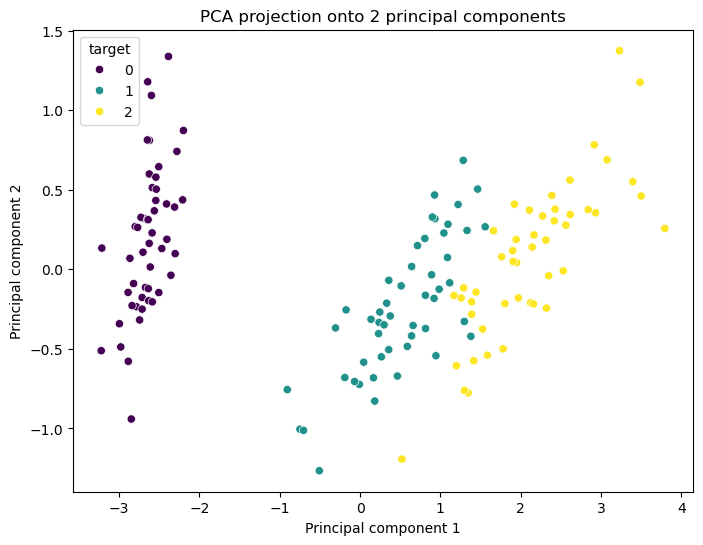

Explained variance ratio for 2 components:
[0.92461872 0.05306648]


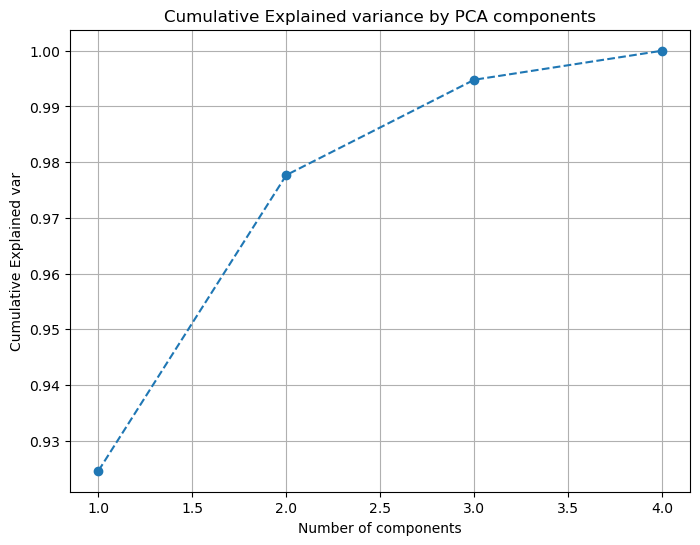

In [11]:
features = iris.feature_names
x = df.loc[:,features].values
y = df.loc[:,['target']].values

### Initializing PCA to reduce the data to 2 components

pca = PCA(n_components=2)
principalcomponents = pca.fit_transform(x)

## Creating dataframe for the two principal components
principaldf = pd.DataFrame(data = principalcomponents, columns=['PC1','PC2'])

## Concatenate the target variable for plotting

final_df = pd.concat([principaldf,df[['target']]],axis = 1)

print(final_df)

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1',y = 'PC2', hue = 'target', data = final_df, palette = 'viridis')
plt.title("PCA projection onto 2 principal components")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.legend(title='target')
plt.show()

## Analyzing the explained variance

print("Explained variance ratio for 2 components:")
print(pca.explained_variance_ratio_)

## cumulative explained variance with all components
pca_full = PCA().fit(x)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize = (8,6))
plt.plot(np.arange(1,len(cum_var)+1),cum_var,marker = 'o', linestyle = '--')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained var")
plt.title("Cumulative Explained variance by PCA components")
plt.grid(True)
plt.show()

## PCA on breast cancer dataset

In [29]:
# importing the dataset
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

# creating dataframe with feature names
df_bc = pd.DataFrame(bc.data,columns = bc.feature_names)
df_bc['target'] = bc.target

df_bc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [30]:
## checking the value count of each class
df_bc['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [31]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

## 1 --> malignant
## 0 --> benign

In [32]:
## Checking the shape of the data
df_bc.shape

(569, 31)

In [33]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [34]:
df_bc.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Extracting feature and target

In [35]:
features = bc.feature_names
x = df_bc.loc[:,features].values
y = df_bc.loc[:,['target']].values

## Standardising the features
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

print("Mean of standardized features(should be close to 0):",np.mean(x_std,axis = 0))
print("Standard deviation (should be 1):",np.std(x_std,axis = 0))

Mean of standardized features(should be close to 0): [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
Standard deviation (should be 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


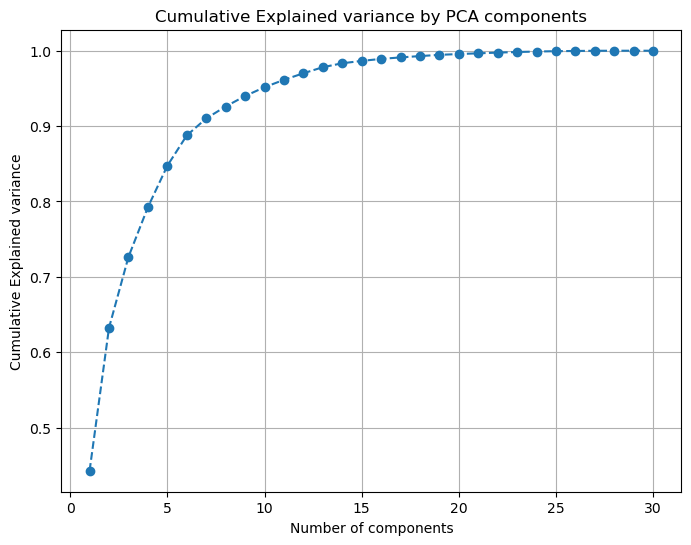

In [36]:
## cumulative explained variance with all components
pca_full = PCA().fit(x_std)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize = (8,6))
plt.plot(np.arange(1,len(cum_var)+1),cum_var,marker = 'o', linestyle = '--')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained variance")
plt.title("Cumulative Explained variance by PCA components")
plt.grid(True)
plt.show()

In [49]:
### Initializing PCA to reduce the data to 2 components

pca = PCA(n_components=2)
principalcomponents = pca.fit_transform(x_std)

## Creating dataframe for the two principal components
principaldf = pd.DataFrame(data = principalcomponents, columns=['PC1','PC2'])

## Concatenate the target variable for plotting

final_df = pd.concat([principaldf,df_bc[['target']]],axis = 1)

final_df

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


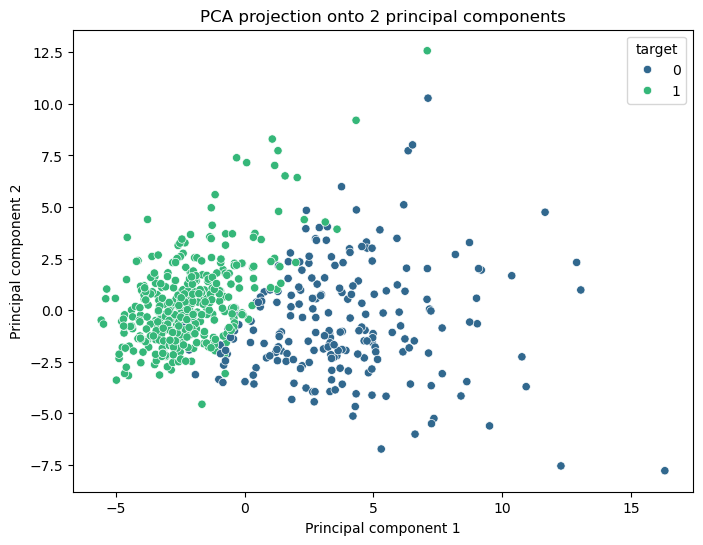

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1',y = 'PC2', hue = 'target', data = final_df, palette = 'viridis')
plt.title("PCA projection onto 2 principal components")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.legend(title='target')
plt.show()

In [51]:
print("Explained variance ratio for 2 components:")
print(pca.explained_variance_ratio_)

Explained variance ratio for 2 components:
[0.44272026 0.18971182]


In [52]:
sum(pca.explained_variance_ratio_)

0.6324320765155944

## so 2 components are not enough to explain the other features

In [56]:
### Initializing PCA to reduce the data to 10 components(as elbow begins after 10th feature)

pca = PCA(n_components=10)
principalcomponents = pca.fit_transform(x_std)

## Creating dataframe for the two principal components
principaldf = pd.DataFrame(data = principalcomponents, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

## Concatenate the target variable for plotting

final_df = pd.concat([principaldf,df_bc[['target']]],axis = 1)

print(final_df)
print("Explained variance ratio for 10 components:")
print(pca.explained_variance_ratio_)

           PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159372   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013357   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936212   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596131   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716328   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192759   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223084   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698954   

          PC8       PC9      PC10  target  
0   -0.

In [57]:
sum(pca.explained_variance_ratio_)

0.9515688143209542